In [ ]:
# Reads in a FITS file calibration, degrates it for easy downloads, and saves it

# Created 2023 Oct. 3 by E.S.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import corner
from astropy.table import Table

In [2]:
# path stems

stem = '/Users/bandari/Documents/git.repos/rrlfe/rrlfe_io_20230507_synthetic/'

In [3]:
hdul = fits.open(stem + 'calib_solution_20230507.fits')

In [4]:
samples = hdul[1].data

In [5]:
a_degraded = samples.field(0)
b_degraded = samples.field(1)
c_degraded = samples.field(2)
d_degraded = samples.field(3)
f_degraded = samples.field(4)
g_degraded = samples.field(5)
h_degraded = samples.field(6)
k_degraded = samples.field(7)

In [6]:
df_pre_degraded = pd.DataFrame({'a':a_degraded,
                            'b':b_degraded,
                            'c':c_degraded,
                            'd':d_degraded,
                            'f':f_degraded,
                            'g':g_degraded,
                            'h':h_degraded,
                            'k':k_degraded})

In [7]:
df_degraded = df_pre_degraded.iloc[::100, :]

In [8]:
'''
t_degraded = Table([df_degraded['a'], 
           df_degraded['b'], 
           df_degraded['c'], 
           df_degraded['d'], 
           df_degraded['f'], 
           df_degraded['g'], 
           df_degraded['h'], 
           df_degraded['k']], 
          names=('a', 'b', 'c', 'd', 'f', 'g', 'h', 'k'))
'''

"\nt_degraded = Table([df_degraded['a'], \n           df_degraded['b'], \n           df_degraded['c'], \n           df_degraded['d'], \n           df_degraded['f'], \n           df_degraded['g'], \n           df_degraded['h'], \n           df_degraded['k']], \n          names=('a', 'b', 'c', 'd', 'f', 'g', 'h', 'k'))\n"

In [9]:
df_pre_degraded_np = np.array(df_pre_degraded)
df_degraded_np = np.array(df_degraded)

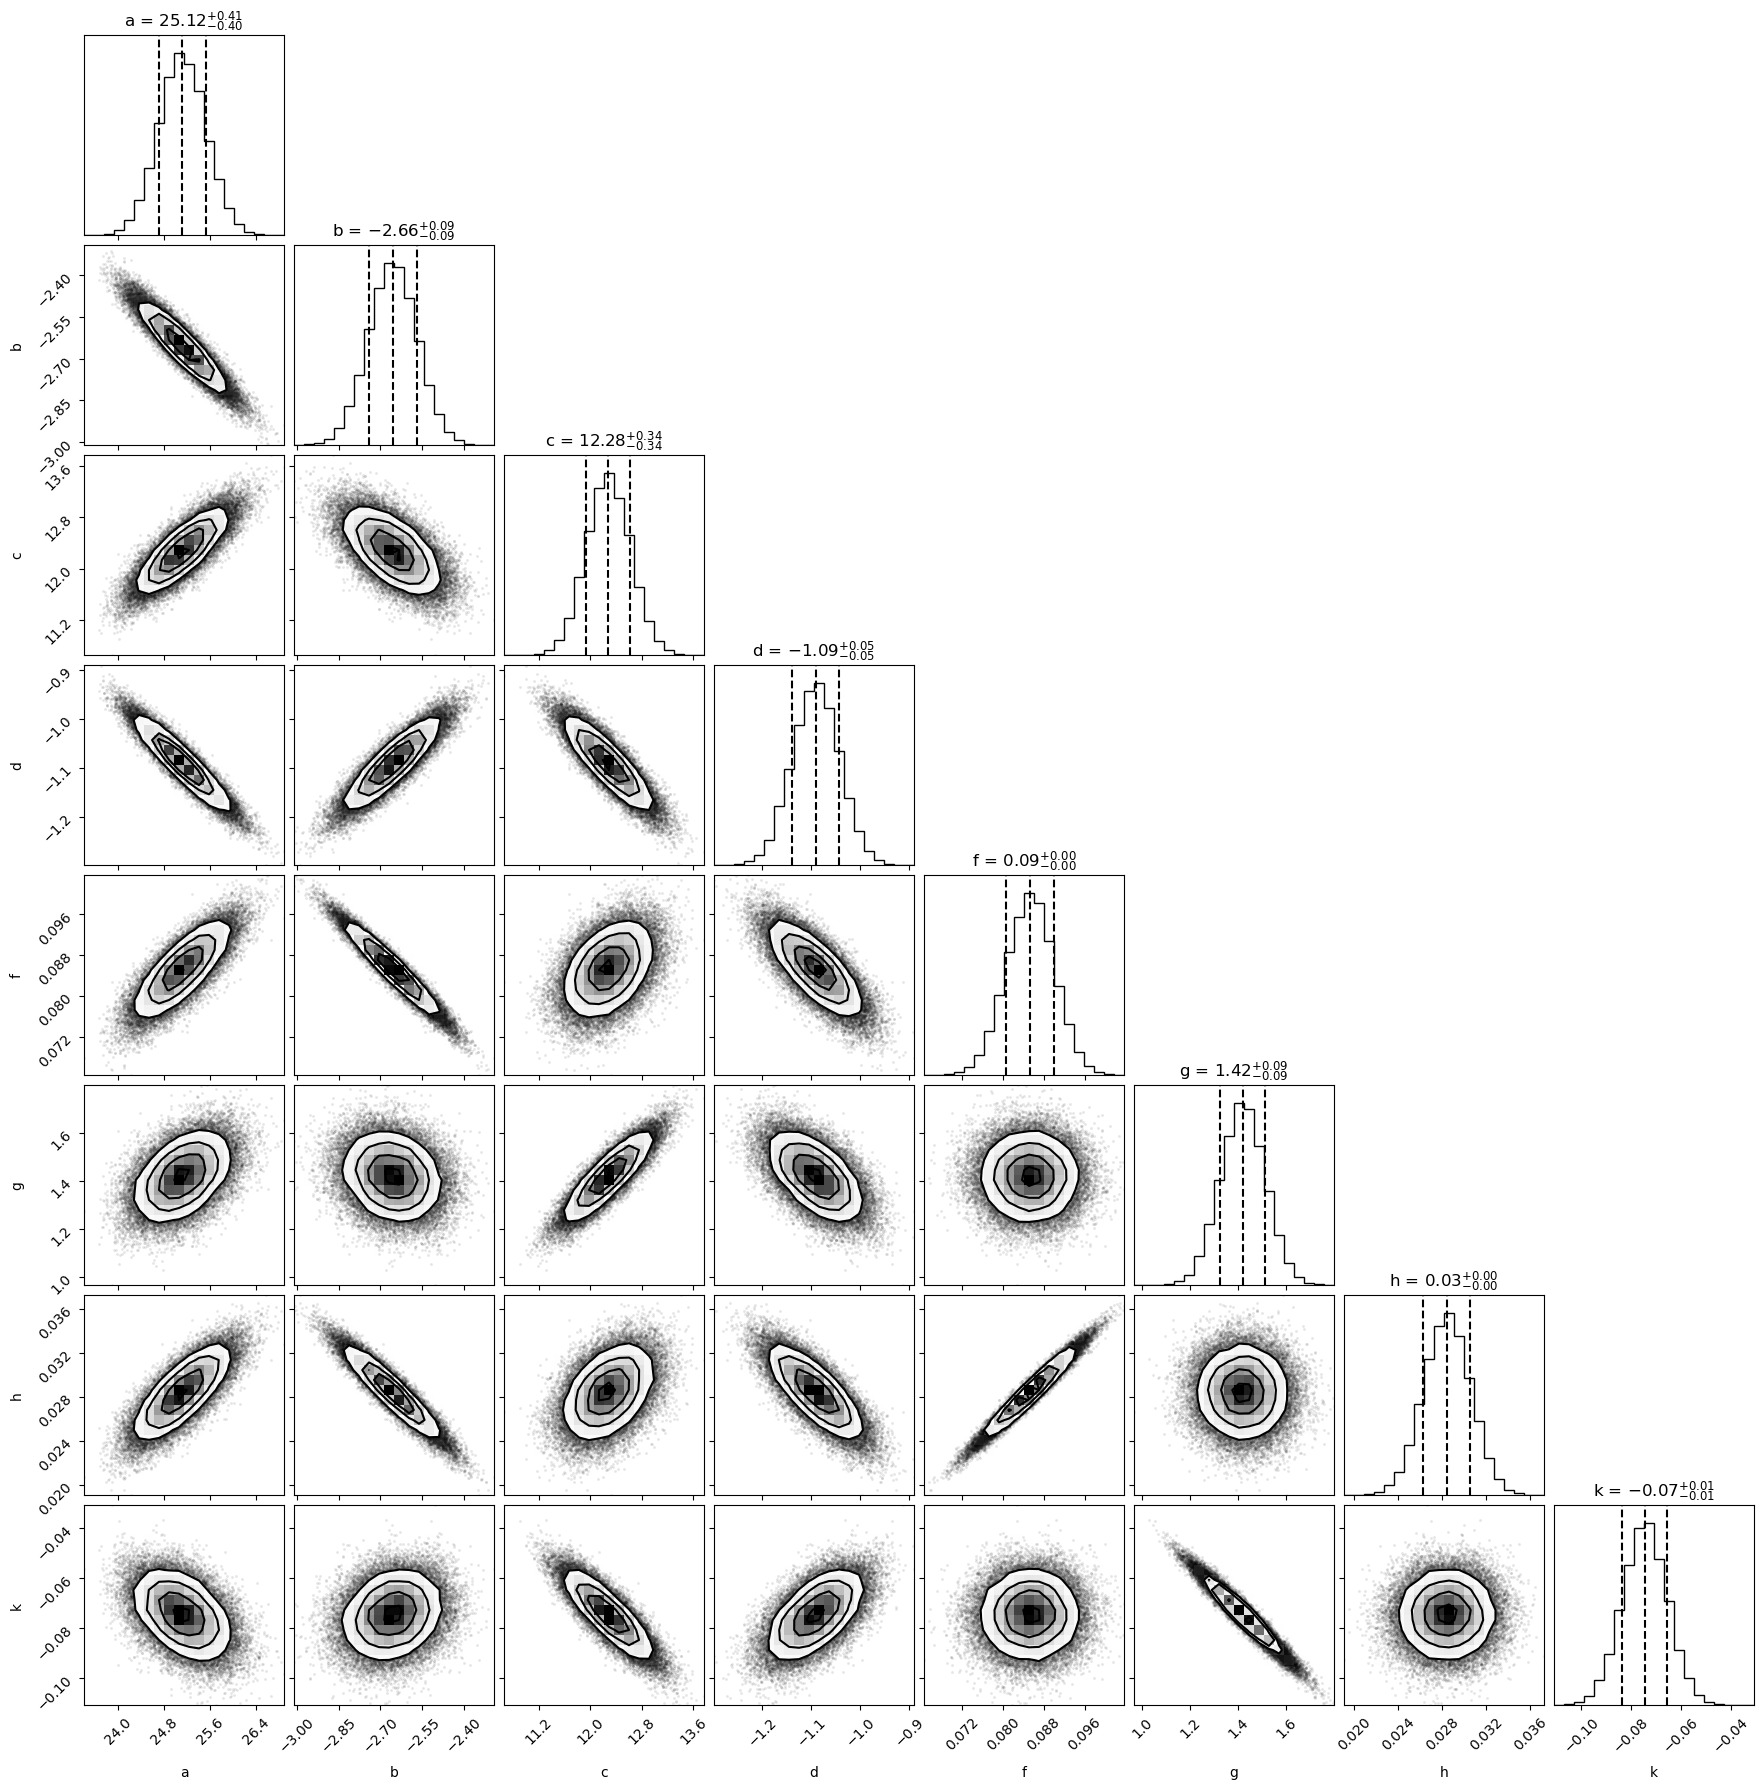

In [10]:
figure = corner.corner(df_degraded_np, 
                       labels=['a','b','c','d','f','g','h','k'], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True,
                       title_kwargs={"fontsize": 12},)

In [11]:
figure.savefig('test.png')

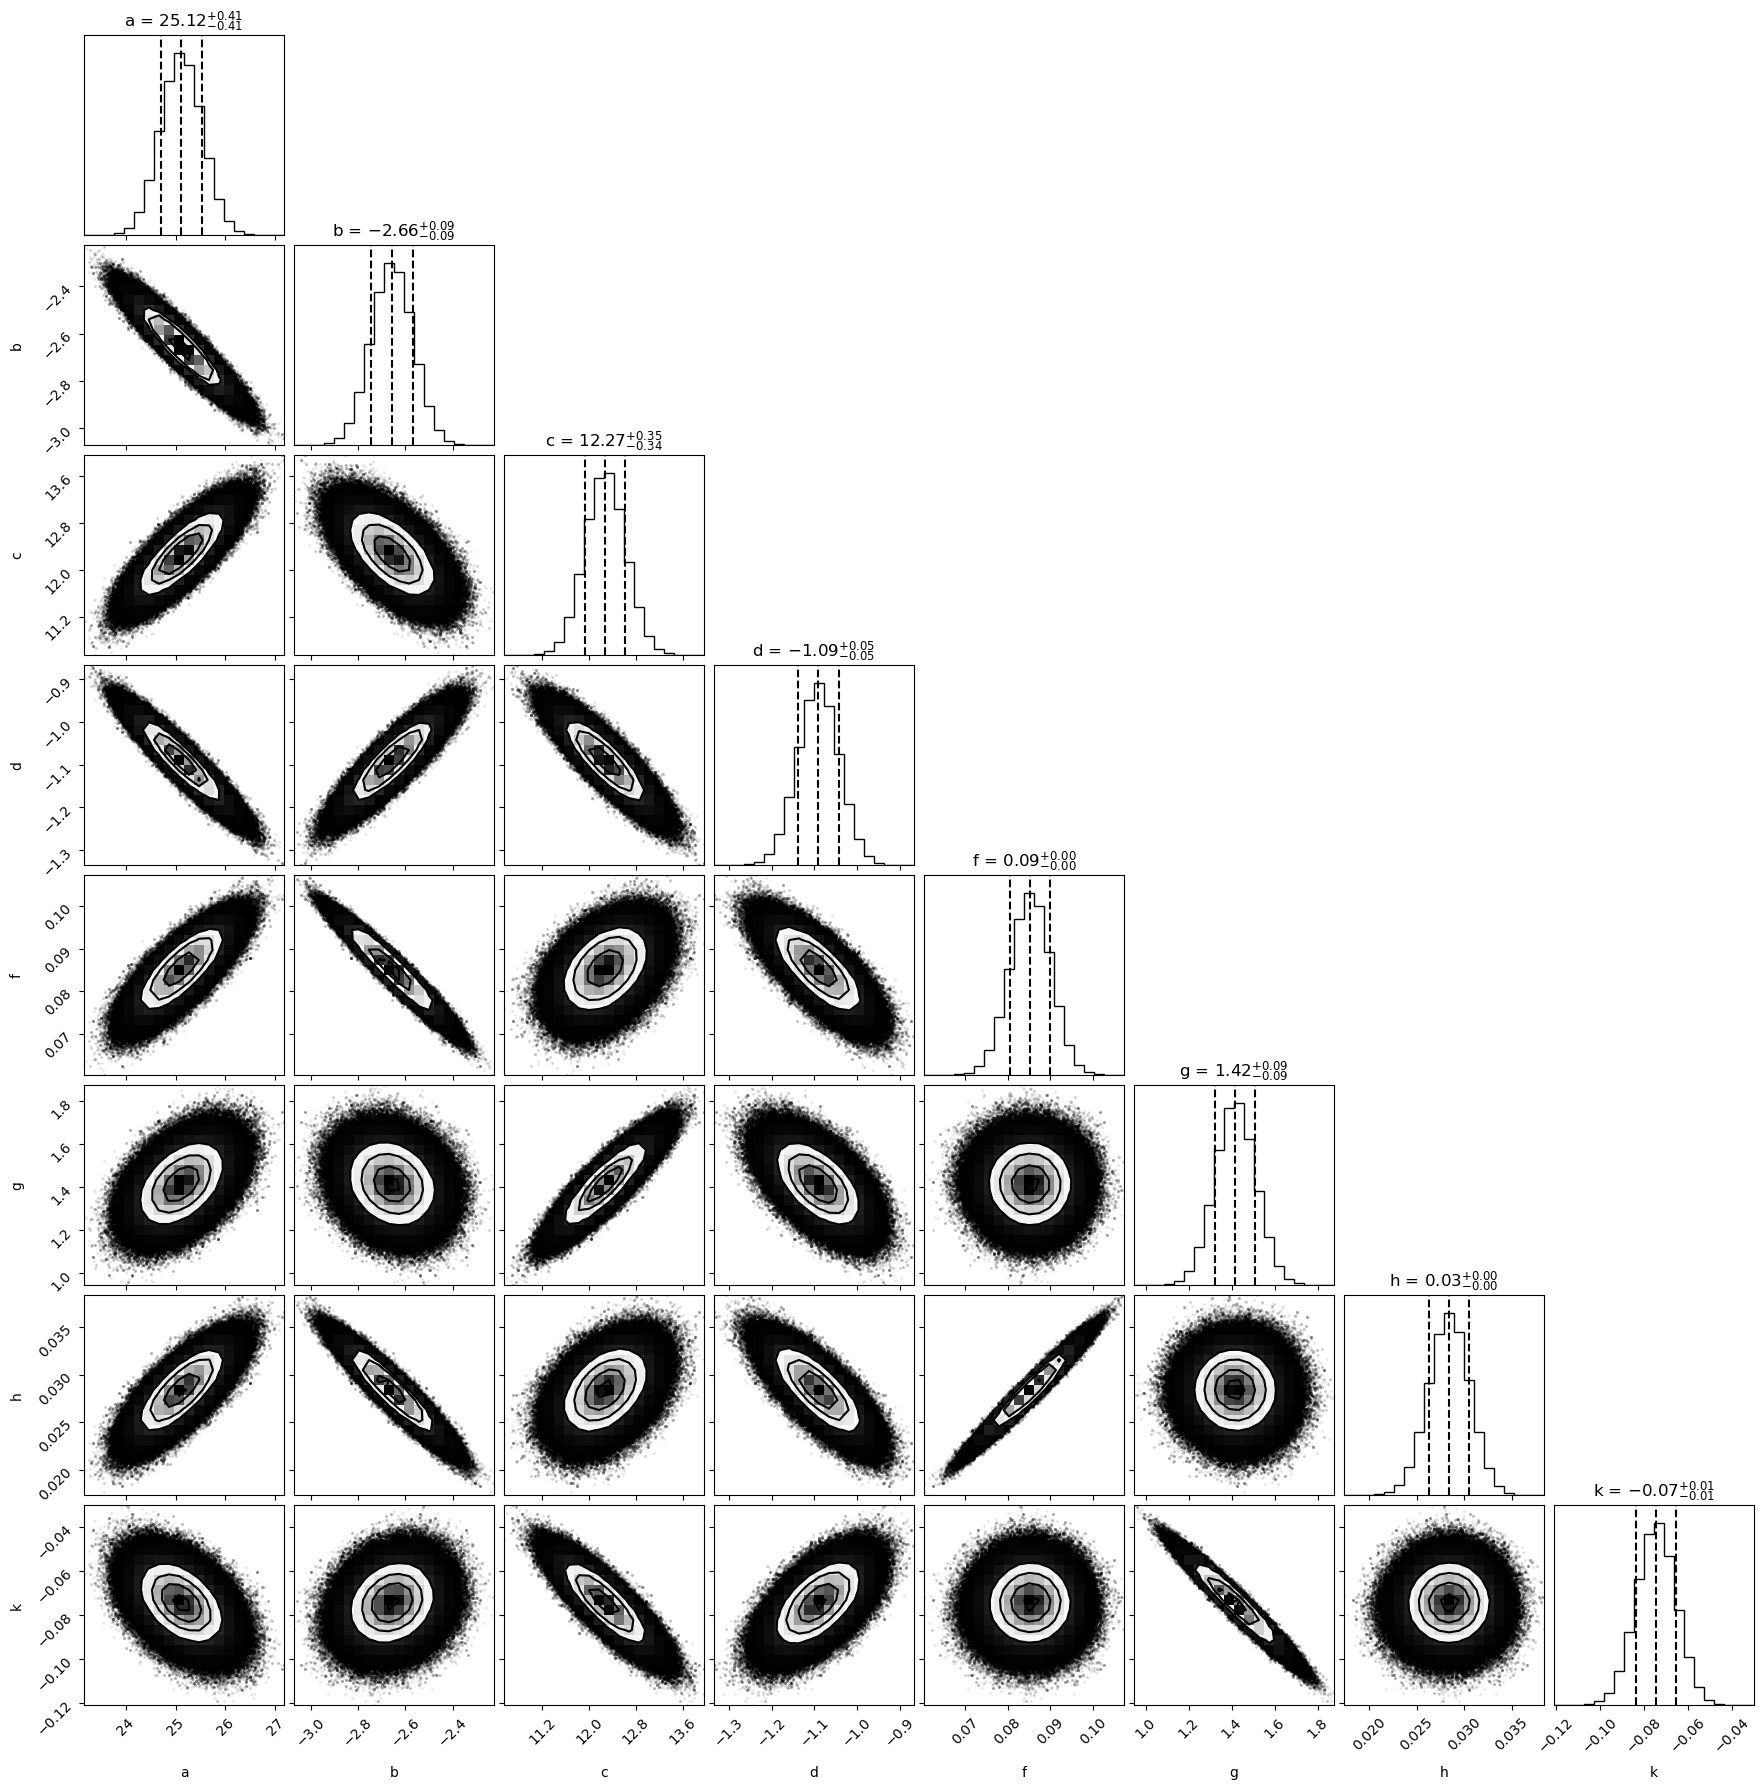

In [12]:
figure = corner.corner(df_pre_degraded, 
                       labels=['a','b','c','d','f','g','h','k'], 
                       quantiles=[0.16, 0.5, 0.84], 
                       show_titles=True,
                       title_kwargs={"fontsize": 12},)

In [13]:
figure.savefig('test.png')

In [10]:
len(df_degraded['a'].values)

48000

In [11]:
hdr_deg = hdul[1].header
hdr_deg["HISTORY"] = "This FITS file is a degradation of the original, by a factor of 1:100"

a_col = fits.Column(name='a', format='D', array=np.array(df_degraded['a'].values))
b_col = fits.Column(name='b', format='D', array=np.array(df_degraded['b'].values))
c_col = fits.Column(name='c', format='D', array=np.array(df_degraded['c'].values))
d_col = fits.Column(name='d', format='D', array=np.array(df_degraded['d'].values))
f_col = fits.Column(name='f', format='D', array=np.array(df_degraded['f'].values))
g_col = fits.Column(name='g', format='D', array=np.array(df_degraded['g'].values))
h_col = fits.Column(name='h', format='D', array=np.array(df_degraded['h'].values))
k_col = fits.Column(name='k', format='D', array=np.array(df_degraded['k'].values))

hdu_deg = fits.PrimaryHDU()
table_hdu = fits.BinTableHDU.from_columns([a_col, b_col, c_col, d_col, f_col, g_col, h_col, k_col],
                                          header=hdr_deg)

hdul_deg = fits.HDUList([hdu_deg])
hdul_deg.append(table_hdu)

In [12]:
hdul_deg.writeto('junk_deg_1-100_calib_solution_20230507.fits')